In [1]:
# tabular Q learning
# randomness. Epsilon = 1.
# repetitions = 10 --> 10x performance of randomness
# except for "performance test", there still epsilon 0. let's see what it learned from 5000 episodes randomness
# alpha =0.8
# training: 5000 episodes
# test: 500 episodes

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def maxAction(Q, state):
    values = np.array([Q[state,a] for a in range(4)])
    action = np.argmax(values)
    return action

def choseandcheck(Q, a, observation, EPSILON, env, s):
    rand = np.random.random()
    if rand < (1-EPSILON):
        a = maxAction(Q,s)
    else:
        a = np.random.randint(0,4)
   # print(env.step(a), a)
    new_state, reward, done, _ = env.step(a)
    observation_ = numpy_transformer_light(new_state)
    #print(observation_, '\n\n', observation)
    while observation==observation_:
        #print("REACHED)")
        Q[s,a] -= 1
        rand = np.random.random()
        if rand < (1-EPSILON):
            a = maxAction(Q,s)
        else:
            a = np.random.randint(0,4)
            
        new_state, reward, done, _ = env.step(a)
        observation_ = numpy_transformer_light(new_state)
        
    return a, observation_, reward, done


def numpy_transformer(matrix):
    lst = []
    for i in range(len(matrix)):
            for j in range(len(matrix[0])):
                    lst.append(int(matrix[i][j]))
    return tuple(lst)

def numpy_transformer_light(matrix):
    lst = []
    for i in range(len(matrix)):
            for j in range(len(matrix[0])):
                    lst.append(int(matrix[i][j]))
    return lst


def get_max(state):
    max_value = max(state)
    return max_value

def plotLearning(x, y, x_label, y_label,title):
    plt.scatter(x,y, label = 'skitscat', color = 'k', s=25 , marker = 'o')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)


In [3]:
import gym 
import numpy as np
import gym_2048
import random

#define number of rounds
repetitions = 10
#define episodes per round, use multiple of 100
numGames = 500
round = 1

if __name__ == '__main__':
    env = gym.make('2048-v0')

    #model hyperparameters
    ALPHA = 0.8
    GAMMA = 0.99
    EPSILON = 1.0
    #this variable counts how many times we have won.
    won = 0
    #value we want to reach due to memory restrictions.
    GOAL = 256
    max_value = 0
    num_won = []
    max_values = []
    avg_values = []
    max_total = 0

    #construct state space
 
    states = []
    Q = {}



    BATCH_SIZE = int(numGames/100)
    totalRewards = []
    for i in range(numGames):
        game_won = False
        observation = numpy_transformer_light(env.reset())
        s = tuple(observation)
        #check if observation isn't already in states
        if observation not in states:
            states.append(observation)
            for a in range(4):
                #we changed the state to a to avoid a TypeError,
                #because lists aren't hashable.S
                Q[tuple(s),a] = 0
        rand = np.random.random()

        done = False
        epRewards = 0
        while not done:      
            # choice and validity check to avoid dead ends (loops)
            a, observation_, reward, done = choseandcheck(Q, a, observation, EPSILON, env, s)

            s_ = tuple(observation_)
            if observation_ not in states:
                states.append(observation_)
                for a in range(4):
                    #we changed the state to a to avoid a TypeError,
                    #because lists aren't hashable.
                    Q[tuple(s_),a] = 0
                    

            rand = np.random.random()
            if rand < (1-EPSILON):
                a_ = maxAction(Q,s_)
            else: 
                a_ = np.random.randint(0,4)
            epRewards += reward
            Q[s,a] = Q[s,a] + ALPHA*(reward + GAMMA*Q[s_,maxAction(Q,s_)] - Q[s,a])
            
            # no more needed. that does not check for validity of move. we incorporated thi in choseandcheck
            # s,a = s_,a_

            #checks if the GOAL is reached. Sets the done to True to avoid KeyError (a higher state can be reached
            # but we don't want to reach it, because we don't have in in our state_space.)
            if get_max(observation_)==GOAL:
                game_won = True
            
            if get_max(observation_)>max_value:
                max_value = get_max(observation_)
                
            observation=observation_
        
        
        if game_won == True:
            won+= 1

        #if EPSILON > 0.01:
        #    EPSILON -= 1/(numGames)  
        #else:
        #    EPSILON = 0.01
        totalRewards.append(epRewards)
        max_total += get_max(observation)
        
        if (i+1)%(BATCH_SIZE) == 0:
            new = won/(BATCH_SIZE)
            num_won.append(new)
            max_values.append(max_value)
            average = max_total/BATCH_SIZE
            avg_values.append(average)
            won = 0
            max_value = 0
            max_total = 0
            print("Episode: " + str(i+1))
            
            

C:\Users\matte\Anaconda3\lib\site-packages\gym_2048\env.py:120: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  board[tile_locs] = tiles
Episode: 5
Episode: 10
Episode: 15
Episode: 20
Episode: 25
Episode: 30
Episode: 35
Episode: 40
Episode: 45
Episode: 50
Episode: 55
Episode: 60
Episode: 65
Episode: 70
Episode: 75
Episode: 80
Episode: 85
Episode: 90
Episode: 95
Episode: 100
Episode: 105
Episode: 110
Episode: 115
Episode: 120
Episode: 125
Episode: 130
Episode: 135
Episode: 140
Episode: 145
Episode: 150
Episode: 155
Episode: 160
Episode: 165
Episode: 170
Episode: 175
Episode: 180
Episode: 185
Episode: 190
Episode: 195
Episode: 200
Episode: 205
Episode: 210
Episode: 215
Episode: 220
Episode: 225
Episode: 230
Episode: 235
Episode: 240
Episode: 245
Episode: 250
Episode

In [4]:
x = [j for j in range(1,101)]

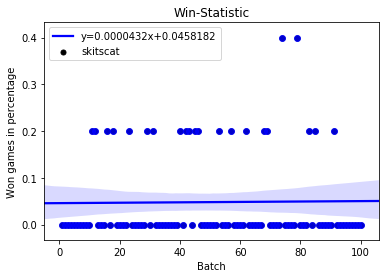

Average performance is  0.047978397839783984
Average performance is  155.55782778277828
Average performance is  98.4303102310231


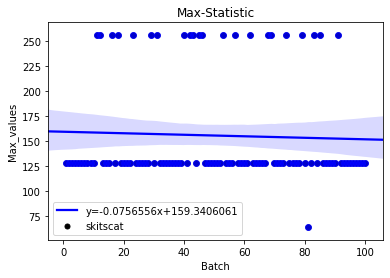

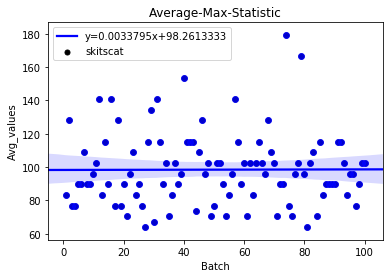

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

plotLearning(x,num_won,'Batch','Won games in percentage', 'Win-Statistic')
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(x,num_won)

# use line_kws to set line label for legend
ax = sns.regplot(x=x, y=num_won, color='b', 
 line_kws={'label':"y={0:.7f}x+{1:.7f}".format(slope,intercept)})

ax.legend()

plt.show()

avg_performance_test = intercept + 50*slope
print("Average performance is ", avg_performance_test)

plotLearning(x,max_values,'Batch','Max_values', 'Max-Statistic')
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(x,max_values)

# use line_kws to set line label for legend
ax = sns.regplot(x=x, y=max_values, color='b', 
 line_kws={'label':"y={0:.7f}x+{1:.7f}".format(slope,intercept)})

ax.legend()

plt.show()

avg_performance_test = intercept + 50*slope
print("Average performance is ", avg_performance_test)


plotLearning(x,avg_values,'Batch','Avg_values', 'Average-Max-Statistic')
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(x,avg_values)

# use line_kws to set line label for legend
ax = sns.regplot(x=x, y=avg_values, color='b', 
 line_kws={'label':"y={0:.7f}x+{1:.7f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()

avg_performance_test = intercept + 50*slope
print("Average performance is ", avg_performance_test)

C:\Users\matte\Anaconda3\lib\site-packages\gym_2048\env.py:120: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  board[tile_locs] = tiles
Episode: 5
Episode: 10
Episode: 15
Episode: 20
Episode: 25
Episode: 30
Episode: 35
Episode: 40
Episode: 45
Episode: 50
Episode: 55
Episode: 60
Episode: 65
Episode: 70
Episode: 75
Episode: 80
Episode: 85
Episode: 90
Episode: 95
Episode: 100
Episode: 105
Episode: 110
Episode: 115
Episode: 120
Episode: 125
Episode: 130
Episode: 135
Episode: 140
Episode: 145
Episode: 150
Episode: 155
Episode: 160
Episode: 165
Episode: 170
Episode: 175
Episode: 180
Episode: 185
Episode: 190
Episode: 195
Episode: 200
Episode: 205
Episode: 210
Episode: 215
Episode: 220
Episode: 225
Episode: 230
Episode: 235
Episode: 240
Episode: 245
Episode: 250
Episode

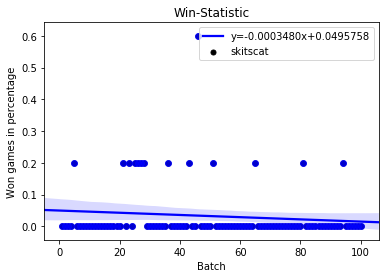

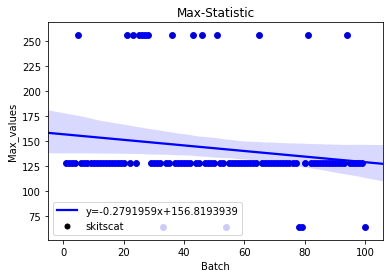

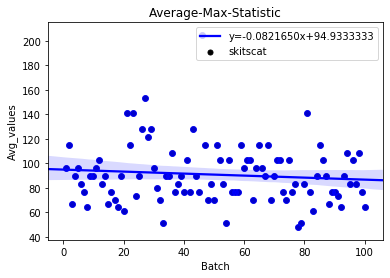

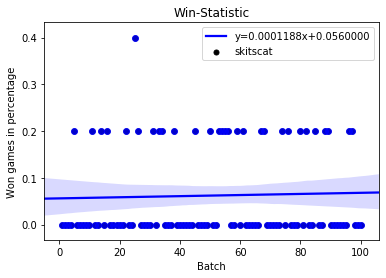

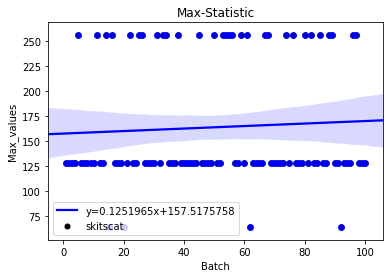

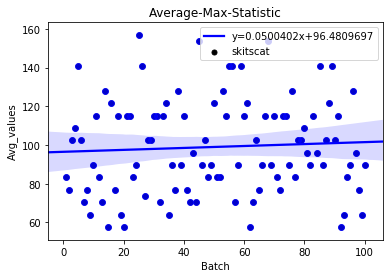

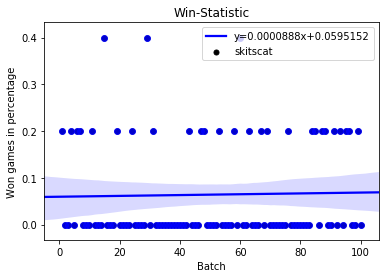

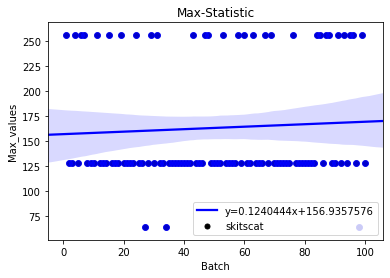

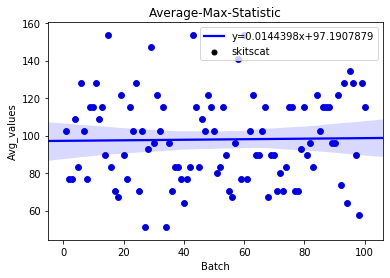

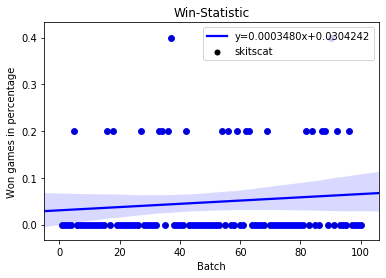

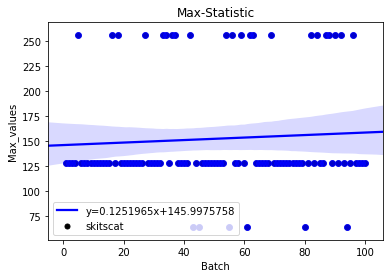

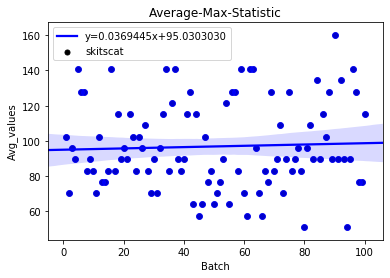

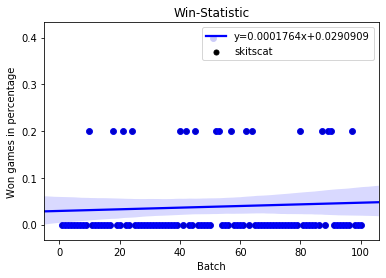

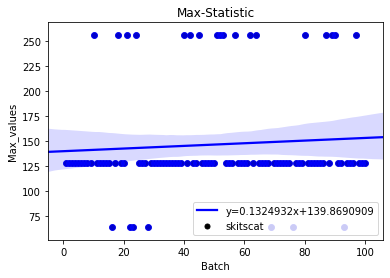

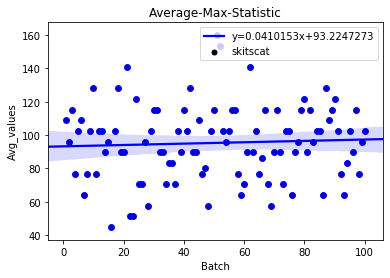

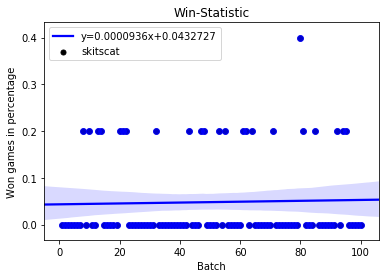

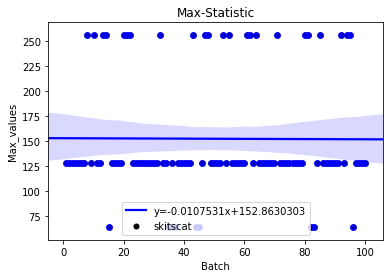

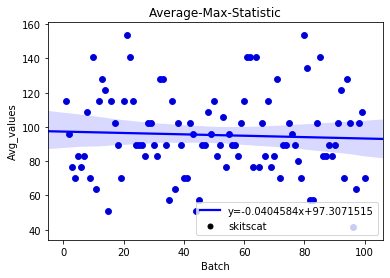

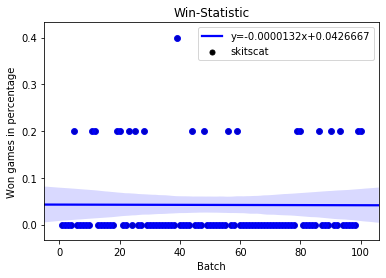

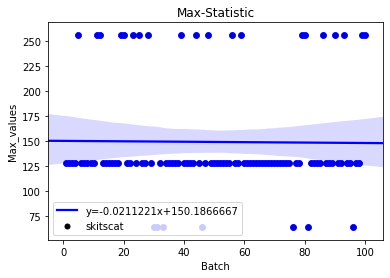

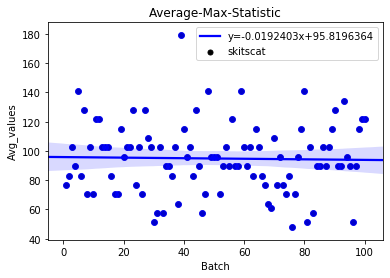

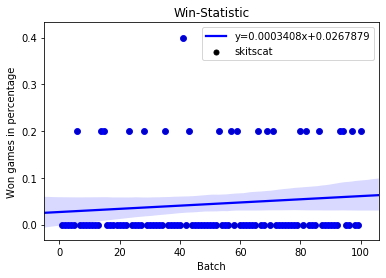

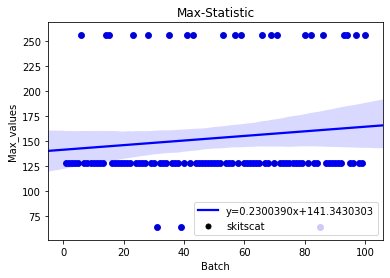

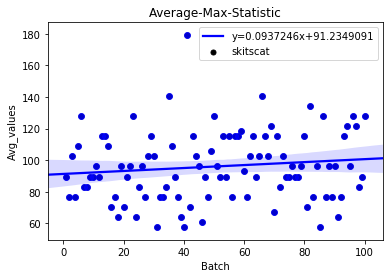

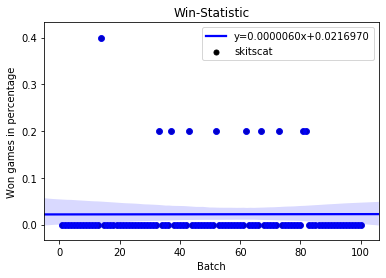

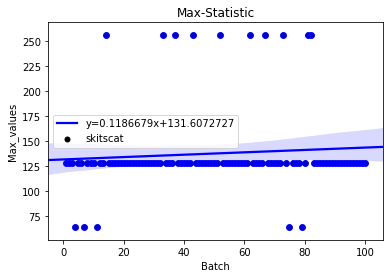

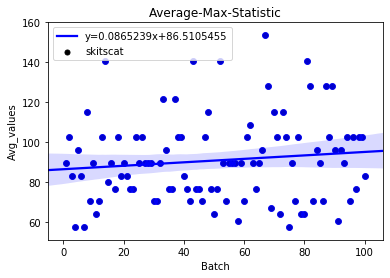

In [6]:
#try to add how many repetitive rounds...enter number of repetitions

while round < repetitions:
    round += 1
    if __name__ == '__main__':
        env = gym.make('2048-v0')

        #model hyperparameters (commetn what doesn need to be rewritten)
        #ALPHA = 0.1
        #GAMMA = 0.99
        #As already some knowledge, less randomness. still decreasing. reduce start             with each repetition
        EPSILON = 1   #/round
        #this variable counts how many times we have won.
        won = 0
        #value we want to reach due to memory restrictions.
        #GOAL = 512
        max_value = 0
        #num_won = []
        #max_values = []
        #avg_values = []
        max_total = 0

        #construct state space
    
        #states = []
        #Q = {}

        #numGames = 5000
        BATCH_SIZE = int(numGames/100)
        
        for i in range(numGames):
            game_won = False
            observation = numpy_transformer_light(env.reset())
            s = tuple(observation)
            #check if observation isn't already in states
            if observation not in states:
                states.append(observation)
                for a in range(4):
                    #we changed the state to a to avoid a TypeError,
                    #because lists aren't hashable.S
                    Q[tuple(s),a] = 0
            rand = np.random.random()

            done = False
            epRewards = 0
            while not done:      
                # choice and validity check to avoid dead ends (loops)
                a, observation_, reward, done = choseandcheck(Q, a, observation, EPSILON, env, s)

                s_ = tuple(observation_)
                if observation_ not in states:
                    states.append(observation_)
                    for a in range(4):
                        #we changed the state to a to avoid a TypeError,
                        #because lists aren't hashable.
                        Q[tuple(s_),a] = 0
                        

                rand = np.random.random()
                if rand < (1-EPSILON):
                    a_ = maxAction(Q,s_)
                else: 
                    a_ = np.random.randint(0,4)
                epRewards += reward
                Q[s,a] = Q[s,a] + ALPHA*(reward + GAMMA*Q[s_,maxAction(Q,s_)] - Q[s,a])
                
                # no more needed. that does not check for validity of move. we incorporated thi in choseandcheck
                # s,a = s_,a_

                #checks if the GOAL is reached. Sets the done to True to avoid KeyError (a higher state can be reached
                # but we don't want to reach it, because we don't have in in our state_space.)
                if get_max(observation_)==GOAL:
                    game_won = True
                
                if get_max(observation_)>max_value:
                    max_value = get_max(observation_)
                    
                observation=observation_
            
            
            if game_won == True:
                won+= 1

            #if EPSILON > 0.01:
            #    EPSILON -= 1/(round*numGames)  
           # else:
            #    EPSILON = 0.01
            totalRewards.append(epRewards)
            max_total += get_max(observation)
            
            if (i+1)%(BATCH_SIZE) == 0:
                new = won/(BATCH_SIZE)
                num_won.append(new)
                max_values.append(max_value)
                average = max_total/BATCH_SIZE
                avg_values.append(average)
                won = 0
                max_value = 0
                max_total = 0
                print("Episode: " + str(i+1))



    x = [j for j in range(1,101)]
    lower_bound= (round-1)*100
    upper_bound= round*100



    print("summary stuff from round ", round," below")
    plotLearning(x,num_won[lower_bound:upper_bound],'Batch','Won games in percentage', 'Win-Statistic')
    # get coeffs of linear fit
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,num_won[lower_bound:upper_bound])

    # use line_kws to set line label for legend
    ax = sns.regplot(x=x, y=num_won[lower_bound:upper_bound], color='b', 
    line_kws={'label':"y={0:.7f}x+{1:.7f}".format(slope,intercept)})

    # plot legend
    
    ax.legend()

    plt.show()
    print("round : ", round)
    avg_performance_test = intercept + 50*slope
    print("Average performance is ", avg_performance_test)# plot legend


    plotLearning(x,max_values[lower_bound:upper_bound],'Batch','Max_values', 'Max-Statistic')
    # get coeffs of linear fit
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,max_values[lower_bound:upper_bound])

    # use line_kws to set line label for legend
    ax = sns.regplot(x=x, y=max_values[lower_bound:upper_bound], color='b', 
    line_kws={'label':"y={0:.7f}x+{1:.7f}".format(slope,intercept)})

    # plot legend
    ax.legend()

    plt.show()

    avg_performance_test = intercept + 50*slope
    print("Average performance is ", avg_performance_test)# plot legend



    plotLearning(x,avg_values[lower_bound:upper_bound],'Batch','Avg_values', 'Average-Max-Statistic')
    # get coeffs of linear fit
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,avg_values[lower_bound:upper_bound])

    # use line_kws to set line label for legend
    ax = sns.regplot(x=x, y=avg_values[lower_bound:upper_bound], color='b', 
    line_kws={'label':"y={0:.7f}x+{1:.7f}".format(slope,intercept)})

    # plot legend
    ax.legend()

    plt.show()

    avg_performance_test = intercept + 50*slope
    print("Average performance is ", avg_performance_test)# plot legend
    

In [11]:
# test the performance
if __name__ == '__main__':
    env = gym.make('2048-v0')

    #model hyperparameters
    #ALPHA = 0.5
    #GAMMA = 0.99
    EPSILON = 0
    #this variable counts how many times we have won.
    won = 0
    #value we want to reach due to memory restrictions.
    #GOAL = 256
    max_value_test = 0
    num_won_test = []
    max_values_test = []
    avg_values_test = []
    avg_reward_test = []
    max_total_test = 0
    total_reward_test = 0

    #do not overwrite spaces
 
    #states = []
    #Q = {}

    numGames_test = 500
    BATCH_SIZE = int(numGames_test/100)
    for i in range(numGames_test):
        game_won = False
        observation = numpy_transformer_light(env.reset())
        s = tuple(observation)
        #check if observation isn't already in states
        if observation not in states:
            states.append(observation)
            for a in range(4):
                #we changed the state to a to avoid a TypeError,
                #because lists aren't hashable.S
                Q[tuple(s),a] = 0
        rand = np.random.random()

        done = False
        epRewards = 0
        while not done:      
            # choice and validity check to avoid dead ends (loops)
            a, observation_, reward, done = choseandcheck(Q, a, observation, EPSILON, env, s)

            s_ = tuple(observation_)
            if observation_ not in states:
                states.append(observation_)
                for a in range(4):
                    #we changed the state to a to avoid a TypeError,
                    #because lists aren't hashable.
                    Q[tuple(s_),a] = 0
                    

            rand = np.random.random()
            #this part no more needed actually but "too lazy" to adapt. (epsilon anyway = 0)
            if rand < (1-EPSILON):
                a_ = maxAction(Q,s_)
            else: 
                a_ = np.random.randint(0,4)
            epRewards += reward
            Q[s,a] = Q[s,a] + ALPHA*(reward + GAMMA*Q[s_,maxAction(Q,s_)] - Q[s,a])
            
            # no more needed. that does not check for validity of move. we incorporated thi in choseandcheck
            # s,a = s_,a_

            #checks if the GOAL is reached. Sets the done to True to avoid KeyError (a higher state can be reached
            # but we don't want to reach it, because we don't have in in our state_space.)
            if get_max(observation_)==GOAL:
                game_won = True
            
            if get_max(observation_)>max_value_test:
                max_value_test = get_max(observation_)
                
            observation=observation_
        
        total_reward_test += epRewards
        if game_won == True:
            won+= 1

        #if EPSILON > 0.0002:
        #    EPSILON -= 2/(numGames_test)  
        #else:
        #    EPSILON = 0.0002
        max_total_test += get_max(observation)
        
        if (i+1)%(numGames_test/100) == 0:
            new = won/(BATCH_SIZE)
            num_won_test.append(new)
            max_values_test.append(max_value_test)
            average = max_total_test/BATCH_SIZE
            avg_values_test.append(average)
            avg_reward_test.append(total_reward_test/BATCH_SIZE)
            won = 0
            max_value_test = 0
            max_total_test = 0
            average = 0
            total_reward_test = 0
            print("Episode: " + str(i+1))

C:\Users\matte\Anaconda3\lib\site-packages\gym_2048\env.py:120: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  board[tile_locs] = tiles
Episode: 5
Episode: 10
Episode: 15
Episode: 20
Episode: 25
Episode: 30
Episode: 35
Episode: 40
Episode: 45
Episode: 50
Episode: 55
Episode: 60
Episode: 65
Episode: 70
Episode: 75
Episode: 80
Episode: 85
Episode: 90
Episode: 95
Episode: 100
Episode: 105
Episode: 110
Episode: 115
Episode: 120
Episode: 125
Episode: 130
Episode: 135
Episode: 140
Episode: 145
Episode: 150
Episode: 155
Episode: 160
Episode: 165
Episode: 170
Episode: 175
Episode: 180
Episode: 185
Episode: 190
Episode: 195
Episode: 200
Episode: 205
Episode: 210
Episode: 215
Episode: 220
Episode: 225
Episode: 230
Episode: 235
Episode: 240
Episode: 245
Episode: 250
Episode

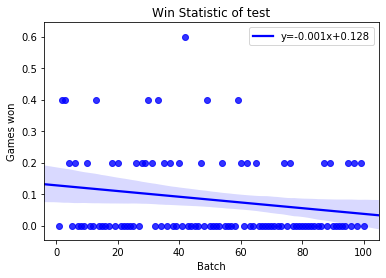

Average performance is  0.08245304530453043


In [8]:
x = [j for j in range(1,101)]

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(x,num_won_test)

# use line_kws to set line label for legend
ax = sns.regplot(x=x, y=num_won_test, color='b', 
 line_kws={'label':"y={0:.3f}x+{1:.3f}".format(slope,intercept)})

plt.xlabel("Batch")
plt.ylabel("Games won")
plt.title("Win Statistic of test")

# plot legend
ax.legend()

plt.show()

avg_performance_test = intercept + 50*slope
print("Average performance is ", avg_performance_test)

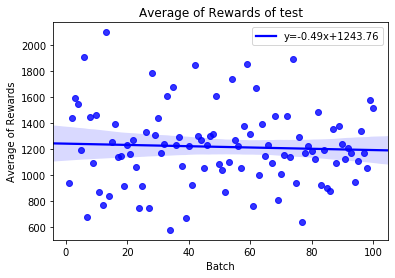

Average performance is  1219.0867374737472


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(x,avg_reward_test)

plt.xlabel("Batch")
plt.ylabel("Average of Rewards")
plt.title("Average of Rewards of test")

# use line_kws to set line label for legend
ax = sns.regplot(x=x, y=avg_reward_test, color='b', 
 line_kws={'label':"y={0:.2f}x+{1:.2f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()

avg_performance_test = intercept + 50*slope
print("Average performance is ", avg_performance_test)

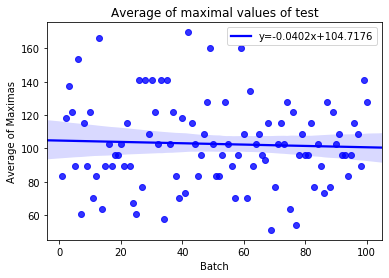

Average performance is  102.70809480948097


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(x,avg_values_test)

plt.xlabel("Batch")
plt.ylabel("Average of Maximas")
plt.title("Average of maximal values of test")


# use line_kws to set line label for legend
ax = sns.regplot(x=x, y=avg_values_test, color='b', 
 line_kws={'label':"y={0:.4f}x+{1:.4f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()

avg_performance_test = intercept + 50*slope
print("Average performance is ", avg_performance_test)

5000
Average performance is  988.6614594900743


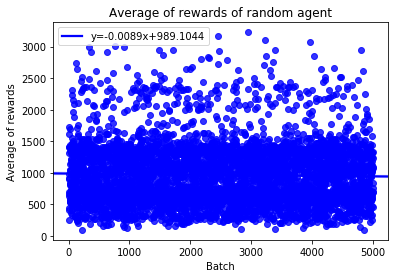

In [13]:
print(len(totalRewards))

x = [j for j in range(1,len(totalRewards)+1)]

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(x,totalRewards)

plt.xlabel("Episodes")
plt.ylabel("rewards")
plt.title("Average performance of random agent")


# use line_kws to set line label for legend
ax = sns.regplot(x=x, y=totalRewards, color='b', 
 line_kws={'label':"y={0:.4f}x+{1:.4f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()
avg_performance_test = intercept + len(totalRewards)/2*slope
print("Average performance is ", avg_performance_test)
